In [ ]:
## Last Value Model  ==> Using Value of Last Data Stored  to predict this week's value of Adjusted Closing Price (Adidas)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pylab import rcParams
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [ ]:
rcParams['figure.figsize'] = 20, 10

In [ ]:
data1=pd.read_csv('/content/ADDYY.csv') #ADIDAS
data2=pd.read_csv('/content/AAPL.csv')  #APPLE
data3=pd.read_csv('/content/TM.csv')    #TOYOTA MOTORS

In [ ]:
data1.loc[:, 'Date'] = pd.to_datetime(data1['Date'],format='%Y-%m-%d')
data1['Month'] = data1['Date'].dt.month
data1.sort_values(by='Date', inplace=True, ascending=True)
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,35.889999,36.230000,35.869999,35.869999,31.387390,7000,6
1,2011-06-14,36.599998,36.700001,36.410000,36.509998,31.947405,11000,6
2,2011-06-15,36.360001,36.570000,35.849998,36.200001,31.676157,51000,6
3,2011-06-16,35.470001,35.570000,35.209999,35.360001,30.941120,20400,6
4,2011-06-17,36.500000,36.700001,36.299999,36.500000,31.938662,16800,6


In [ ]:
data2.loc[:, 'Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['Month'] = data2['Date'].dt.month
data2.sort_values(by='Date', inplace=True, ascending=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,11.685714,11.725357,11.609643,11.664286,10.030155,329473200,6
1,2011-06-14,11.785714,11.901786,11.761071,11.872857,10.209505,334569200,6
2,2011-06-15,11.776786,11.796429,11.602857,11.669643,10.034760,399196000,6
3,2011-06-16,11.675000,11.738571,11.368929,11.612857,9.985929,510591200,6
4,2011-06-17,11.749643,11.758929,11.405714,11.437857,9.835445,615020000,6


In [ ]:
data3.loc[:, 'Date'] = pd.to_datetime(data3['Date'],format='%Y-%m-%d')
data3['Month'] = data3['Date'].dt.month
data3.sort_values(by='Date', inplace=True, ascending=True)
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,80.209999,80.260002,79.400002,79.720001,69.560913,836200,6
1,2011-06-14,80.080002,80.660004,80.040001,80.440002,70.189163,464200,6
2,2011-06-15,79.910004,80.330002,79.279999,79.480003,69.351509,550600,6
3,2011-06-16,79.239998,79.750000,79.029999,79.470001,69.342773,580200,6
4,2011-06-17,79.610001,79.900002,79.370003,79.510002,69.377678,375000,6


# ADIDAS

In [ ]:
num_crossval = int(0.25*len(data1))
num_test = int(0.25*len(data1))
num_train = len(data1) - num_crossval - num_test
data_crossvaltrain = data1[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data1[:num_train][['Date', 'Adj Close']]
data_crossval = data1[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data1[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR ADIDAS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

FOR ADIDAS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

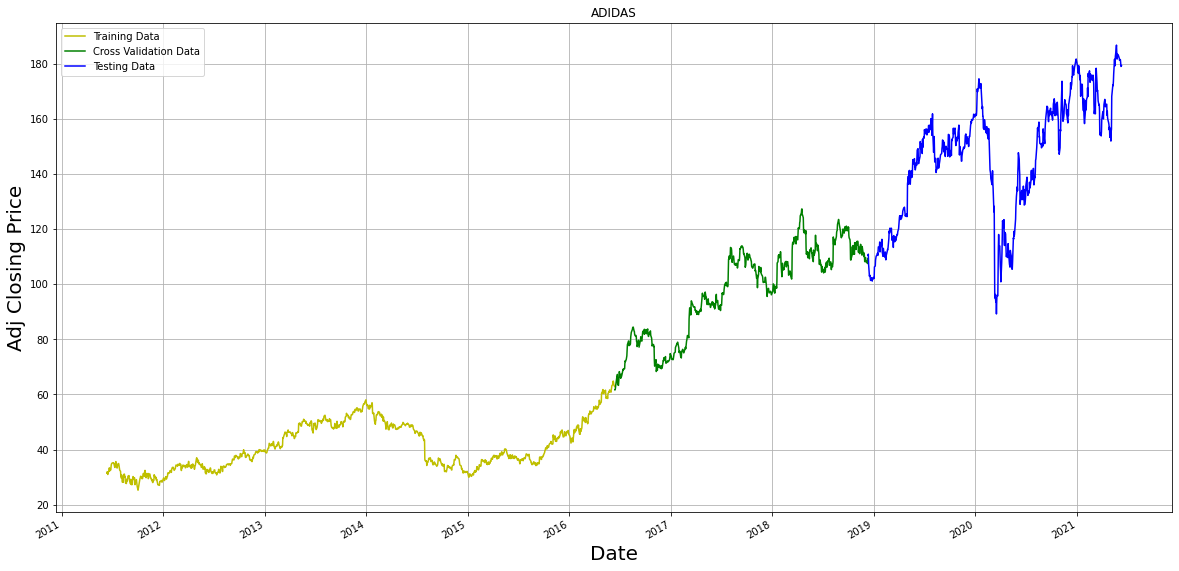

In [ ]:
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="ADIDAS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
def predict(data, target, N, minpr, offset):
    
    pr = data[target].rolling(window = N, min_periods=1).mean() 
    pr = np.concatenate((np.array([np.nan]), np.array(pr[:-1])))
    pr = np.array(pr)
    pr[pr < minpr] = minpr
    
    return pr[offset:]

In [ ]:
def calcmaperr(y_t, y_p): 
    
    y_p =np.array(y_p)
    y_t= np.array(y_t)
    return np.mean(np.abs((y_t - y_p) / y_t)) * 100


In [ ]:
RMSE, mape = [] ,[]

for N in range(1, 3): 
    output = predict(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    mape.append(calcmaperr(data_crossval['Adj Close'], output))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
data_crossval.head()

RMSE = [1.5531707293181853, 1.7539587592143855]
MAPE = [1.116518497152365, 1.2940237688219651]


,Date,Adj Close,output_N1,output_N2
1259,2016-06-14,61.643585,62.852852,63.195633
1260,2016-06-15,61.653114,61.643585,62.248219
1261,2016-06-16,62.281548,61.653114,61.648350
1262,2016-06-17,63.357502,62.281548,61.967331
1263,2016-06-20,65.595100,63.357502,62.819525


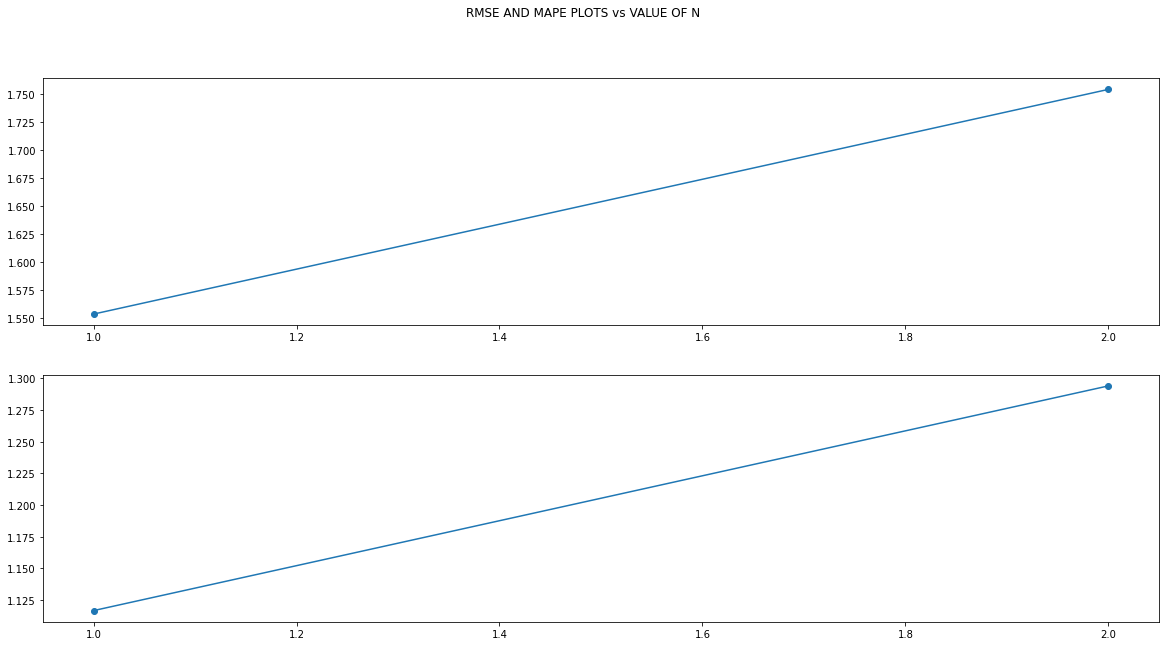

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('RMSE AND MAPE PLOTS vs VALUE OF N')
ax1.plot(range(1,3), RMSE,'o-',)
ax2.plot(range(1,3), mape,'o-')

In [ ]:
## To minimize RMSE And MAPE , we will take N=1 for final predictions from the model


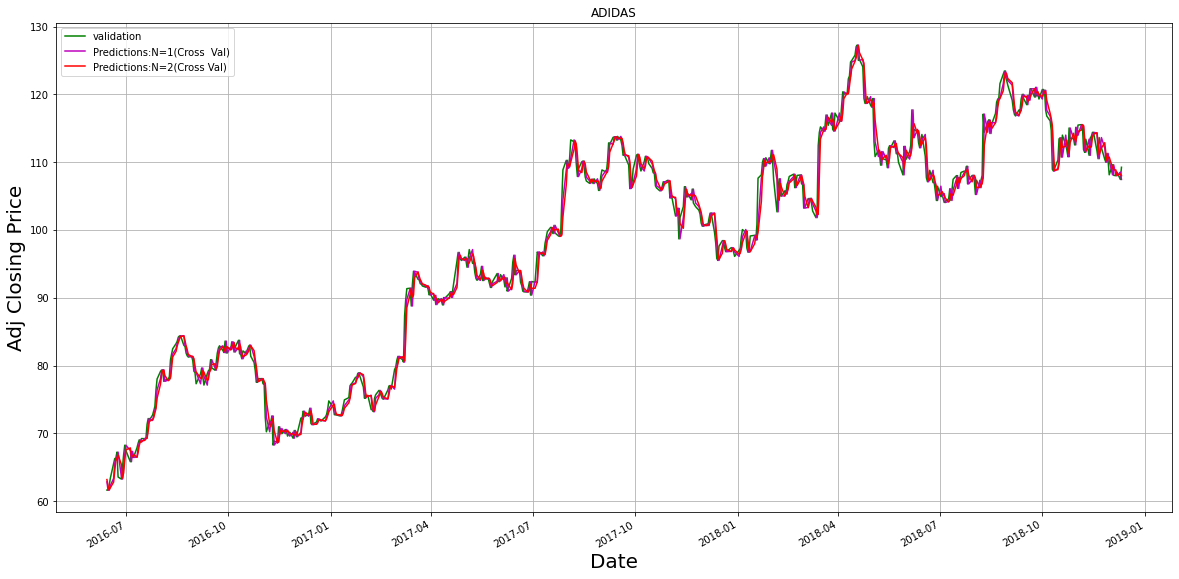

In [ ]:
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True,title="ADIDAS")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.set_ylabel("Adj Closing Price",fontsize=20)
p.set_xlabel("Date",fontsize=20)
p.legend(['validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])


In [ ]:
###Final Model , Nfinal(Nfin)=1 , predicting output on TEST DATA
estimate = predict(data1, 'Adj Close', 1, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(1)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("MAPE = %0.3f%%" % calcmaperr(data_test['Adj Close'], estimate))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N1"]))
data_test.head()

RMSE = 2.994
MAPE = 1.513%
R2 Score on Test Data= 0.9813961227457586


,Date,Adj Close,output_N1
1888,2018-12-12,110.472008,109.251160
1889,2018-12-13,110.852913,110.472008
1890,2018-12-14,107.190369,110.852913
1891,2018-12-17,102.844162,107.190369
1892,2018-12-18,103.254364,102.844162


Text(0.5, 1.0, 'ADIDAS')

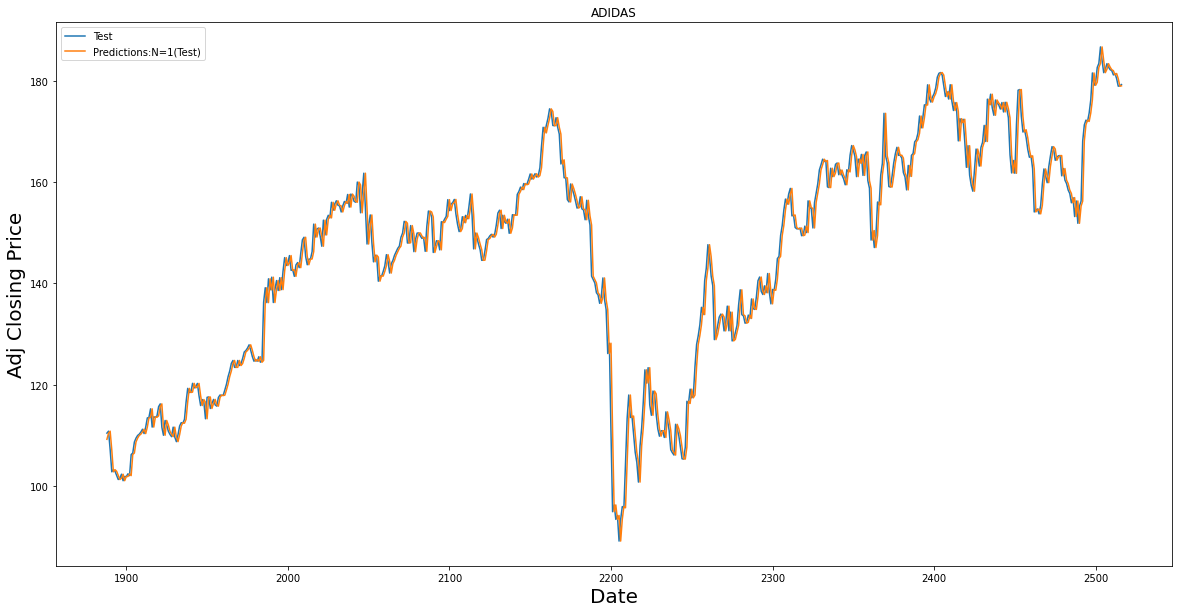

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=1 AND ACTUAL TEST DATA

plt.plot(data_test[['Adj Close','output_N1']])
plt.legend([ 'Test',  'Predictions:N=1(Test)'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Adj Closing Price",fontsize=20)
plt.title("ADIDAS")

# CODE FOR APPLE (AAPL)

FOR APPLE
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

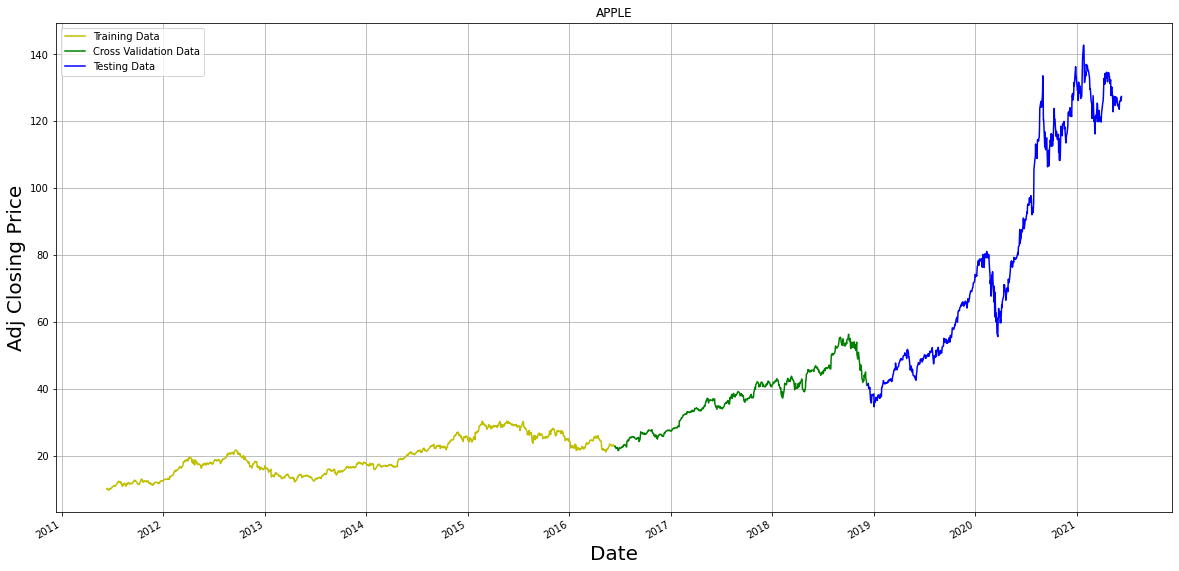

In [ ]:
num_crossval = int(0.25*len(data2))
num_test = int(0.25*len(data2))
num_train = len(data2) - num_crossval - num_test
data_crossvaltrain = data2[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data2[:num_train][['Date', 'Adj Close']]
data_crossval = data2[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data2[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR APPLE")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)


In [ ]:
RMSE, mape = [] ,[]

for N in range(1, 3): 
    output = predict(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    mape.append(calcmaperr(data_crossval['Adj Close'], output))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
## To minimize RMSE And MAPE , we will take N=1 for final predictions from the model

RMSE = [0.5740070094784296, 0.6547954887913657]
MAPE = [0.97059375589849, 1.115962862019491]


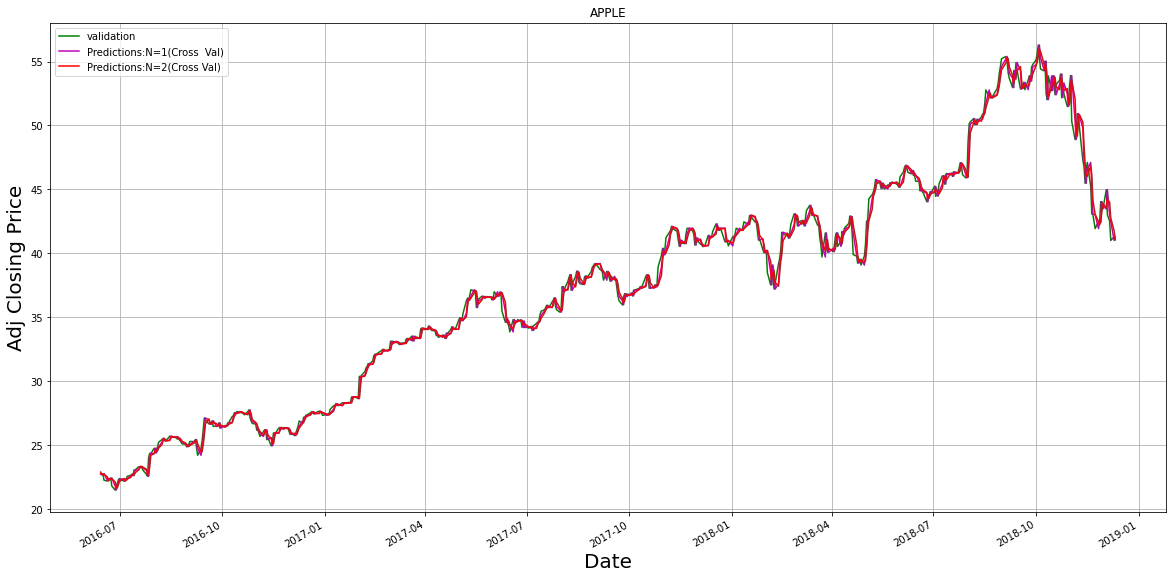

In [ ]:
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True,title="APPLE")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.set_ylabel("Adj Closing Price",fontsize=20)
p.set_xlabel("Date",fontsize=20)
p.legend(['validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])

RMSE = 1.975
MAPE = 1.579%
R2 Score on Test Data= 0.9964248887831869


,Date,Adj Close,output_N1
1888,2018-12-12,41.161091,41.046688
1889,2018-12-13,41.611404,41.161091
1890,2018-12-14,40.279934,41.611404
1891,2018-12-17,39.905083,40.279934
1892,2018-12-18,40.423550,39.905083


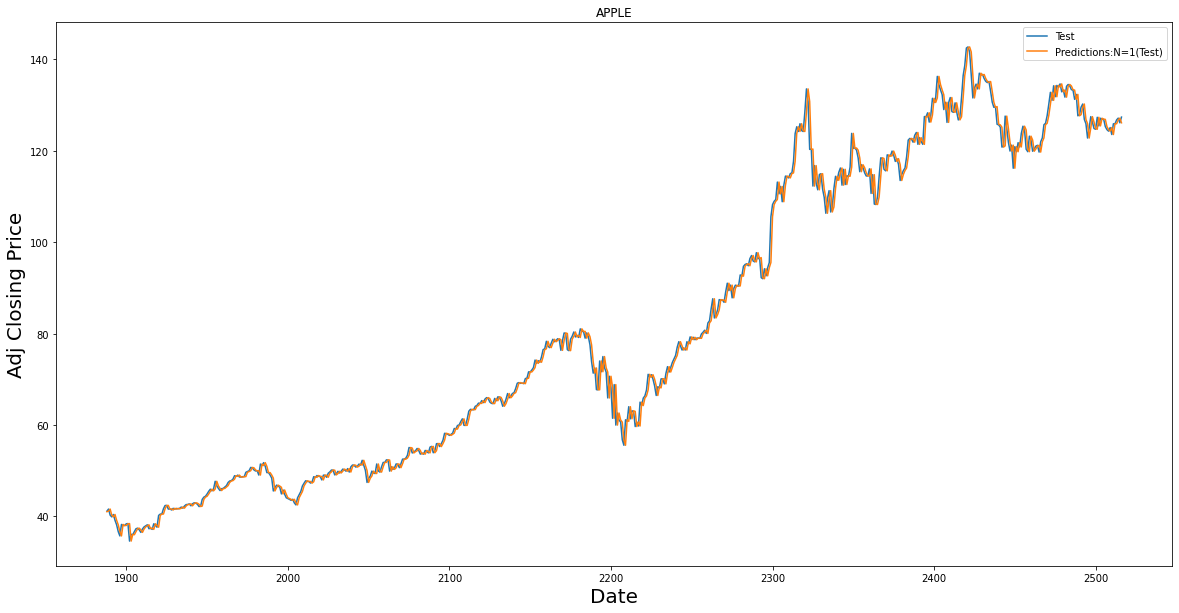

In [ ]:
estimate = predict(data2, 'Adj Close', 1, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(1)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("MAPE = %0.3f%%" % calcmaperr(data_test['Adj Close'], estimate))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N1"]))
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=1 AND ACTUAL TEST DATA

plt.plot(data_test[['Adj Close','output_N1']])
plt.legend([ 'Test',  'Predictions:N=1(Test)'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Adj Closing Price",fontsize=20)
plt.title("APPLE")
data_test.head()





 # TOYOTA MOTORS

FOR TOYOTA MOTORS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

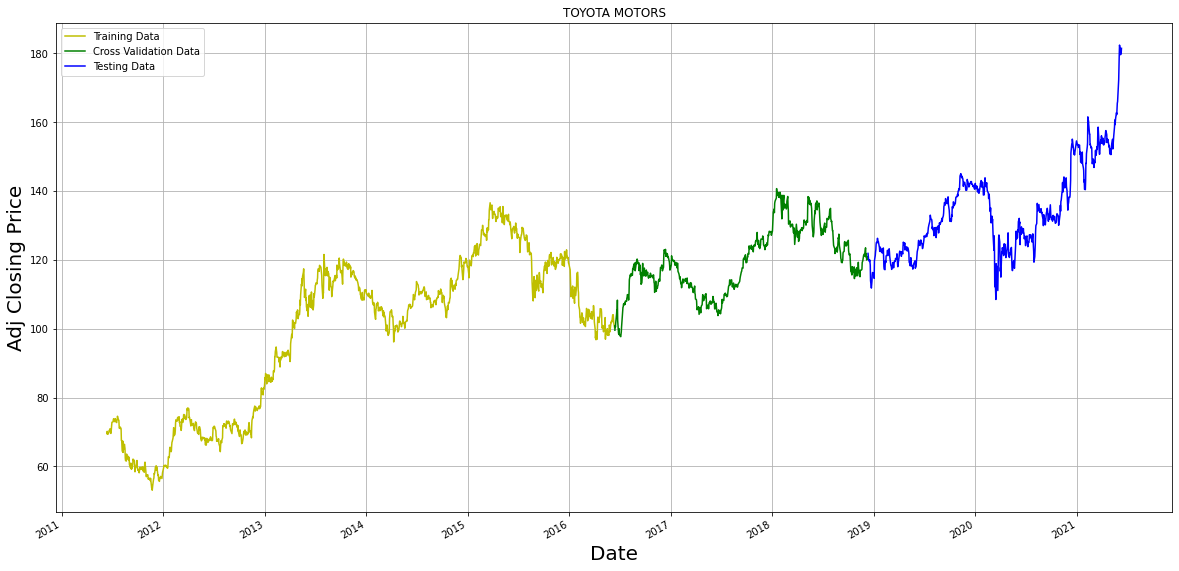

In [ ]:
num_crossval = int(0.25*len(data3))
num_test = int(0.25*len(data3))
num_train = len(data3) - num_crossval - num_test
data_crossvaltrain = data3[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data3[:num_train][['Date', 'Adj Close']]
data_crossval = data3[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data3[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR TOYOTA MOTORS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="TOYOTA MOTORS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
RMSE, mape = [] ,[]

for N in range(1, 3): 
    output = predict(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    mape.append(calcmaperr(data_crossval['Adj Close'], output))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
## To minimize RMSE And MAPE , we will take N=1 for final predictions from the model

RMSE = [1.2869748970130648, 1.4246211957808474]
MAPE = [0.7823624536977252, 0.8799306935799389]


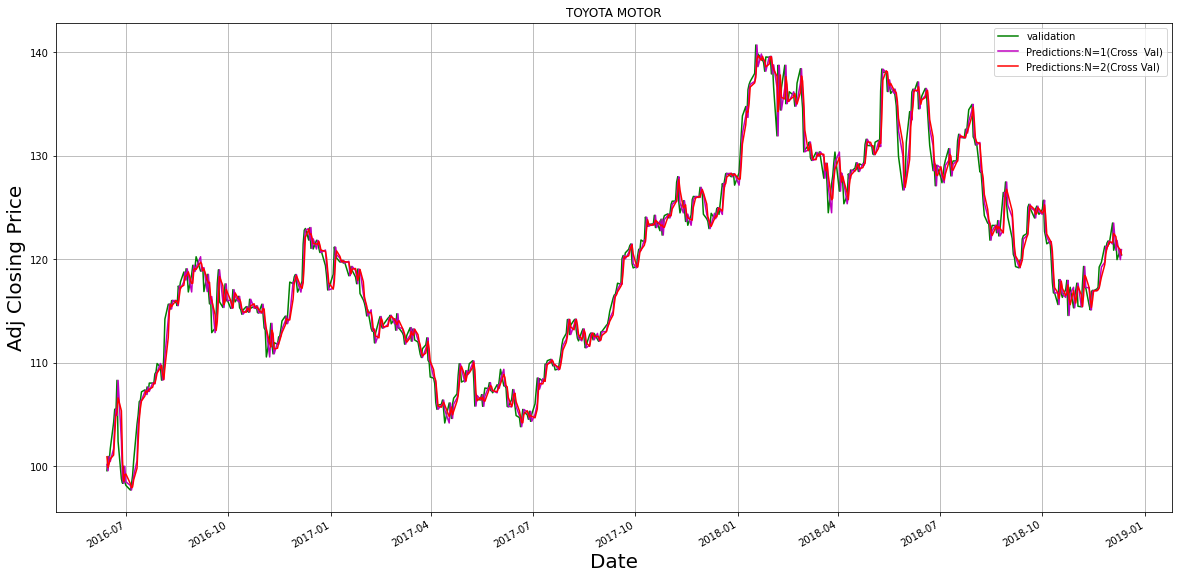

In [ ]:
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True,title="TOYOTA MOTOR")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.set_ylabel("Adj Closing Price",fontsize=20)
p.set_xlabel("Date",fontsize=20)
p.legend(['validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])

RMSE = 1.828
MAPE = 0.967%
R2 Score on Test Data= 0.9806171275168063


,Date,Adj Close,output_N1
1888,2018-12-12,121.889999,120.410004
1889,2018-12-13,120.779999,121.889999
1890,2018-12-14,120.099998,120.779999
1891,2018-12-17,119.550003,120.099998
1892,2018-12-18,120.010002,119.550003


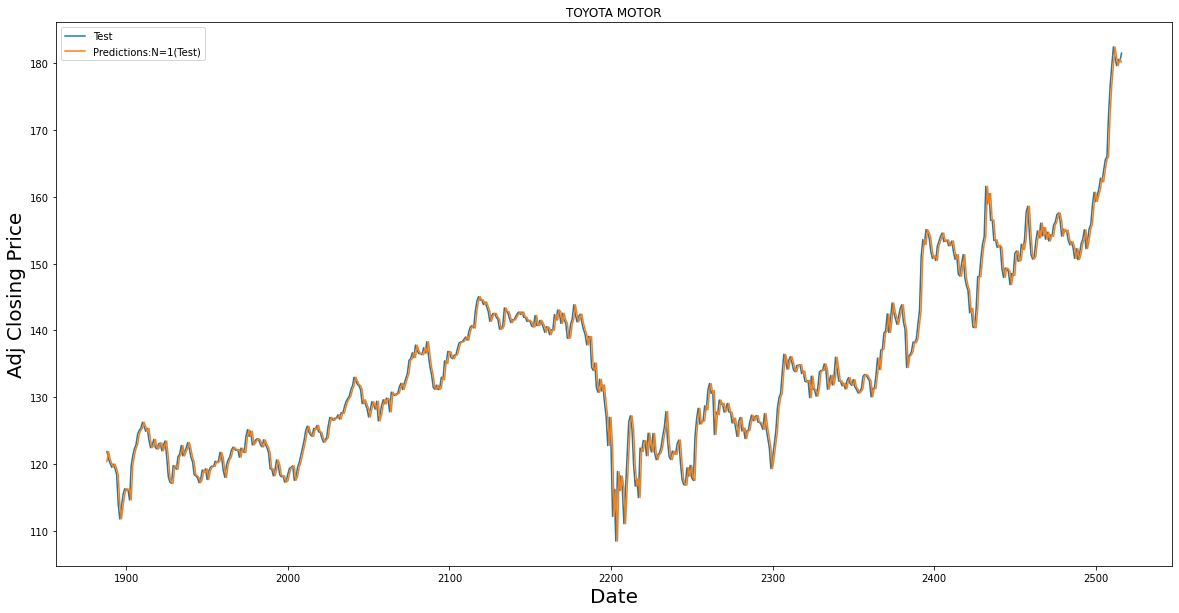

In [ ]:
estimate = predict(data3, 'Adj Close', 1, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(1)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("MAPE = %0.3f%%" % calcmaperr(data_test['Adj Close'], estimate))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N1"]))
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=1 AND ACTUAL TEST DATA

plt.plot(data_test[['Adj Close','output_N1']])
plt.legend([ 'Test',  'Predictions:N=1(Test)'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Adj Closing Price",fontsize=20)
plt.title("TOYOTA MOTOR")
data_test.head()